In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
trainDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d001\\df_train_cbMSIn0d0014nonInDI_STDnorm.csv")
extDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d001\\df_ext_cbMSIn0d0014nonInDI_STDnorm.csv")
ingestedDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d001\\df_ingested_cbMSIn0d0014nonInDI_STDnorm.csv")
fnaDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d001\\df_FNA_cbMSIn0d0014nonInDI_STDnorm.csv")
diDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\0d001\\df_nonInDI_cbMSIn0d0014nonInDI_STDnorm.csv")

In [3]:
trainDEFSDf.describe()

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217,type
count,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,90960.000000
mean,5.924941e-14,-3.042099e-13,-2.656040e-15,-1.334217e-14,-3.978333e-13,-7.210304e-14,5.730928e-14,-7.186648e-15,-6.627079e-15,4.599185e-14,3.423023e-14,2.234029e-14,-8.664409e-14,-7.222406e-16,-6.629848e-17,8.565833e-14,-5.057085e-14,-8.418748e-15,6.582307e-16,0.478353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499534
min,-1.115532e+00,-1.034689e+00,-4.019115e+00,-1.167815e+00,-4.021231e-01,-1.829029e+00,-1.159665e+00,-2.495654e+00,-7.000564e-01,-1.233796e+00,-2.680158e+00,-7.348174e-01,-4.075562e-01,-3.398153e+00,-2.827867e+00,-2.479866e-01,-1.195172e+00,-2.413309e+00,-4.272219e+00,0.000000
25%,-1.115532e+00,-1.034689e+00,-6.738677e-01,-1.167815e+00,-4.021231e-01,-1.864871e-01,-1.159665e+00,-5.570542e-01,-7.000564e-01,-1.233796e+00,-3.022262e-01,-7.348174e-01,-4.075562e-01,-8.433346e-01,-7.816207e-01,-2.479866e-01,-1.195172e+00,-5.983034e-01,-7.678769e-01,0.000000
50%,1.428150e-01,4.207043e-01,-1.232744e-01,4.388972e-01,-4.021231e-01,3.053178e-01,2.361586e-01,-4.843279e-03,-7.000564e-01,1.492159e-01,1.929104e-01,3.493696e-02,-4.075562e-01,6.629433e-02,-4.251684e-02,-2.479866e-01,1.434028e-01,-8.295643e-02,-3.878129e-02,0.000000
75%,4.713052e-01,9.359088e-01,5.633383e-01,8.553809e-01,-4.021231e-01,6.676000e-01,7.213503e-01,6.053524e-01,5.503792e-01,5.518602e-01,5.867701e-01,4.015007e-01,-4.075562e-01,7.930168e-01,5.450693e-01,-2.479866e-01,5.066737e-01,4.851327e-01,7.398945e-01,1.000000
max,1.045415e+01,2.420522e+00,5.840219e+00,3.529203e+00,5.605366e+00,2.659901e+00,3.263572e+00,3.893580e+00,1.101684e+01,9.310617e+00,4.163241e+00,1.325005e+01,1.196499e+01,3.440832e+00,5.331430e+00,9.652960e+00,9.826975e+00,5.029919e+00,4.053376e+00,1.000000


In [4]:
trainDEFSDf

,pixel_id,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,...,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217,type
0,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.688026,0.575039,-1.174342,1.064704,-0.402123,0.530752,-1.159665,-0.447959,4.504377,...,0.763511,4.516319,4.204545,-0.819677,-0.366245,-0.247987,3.236946,-0.936717,0.077753,0
1,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,5.100572,1.505297,-0.377389,1.373070,-0.402123,0.261861,-1.159665,-0.242269,5.622964,...,1.669160,5.492309,4.827037,-0.600190,-0.356642,-0.247987,4.400274,-1.051090,0.456202,0
2,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.446162,0.635507,-0.825087,0.989533,-0.402123,-0.131733,-0.000031,-0.432037,3.715757,...,1.925579,4.409124,3.144312,-0.574390,-0.595243,-0.247987,2.951813,-1.217515,1.303023,0
3,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.196998,0.441137,-0.418456,1.281754,-0.402123,-0.080708,-1.159665,-0.334364,3.504376,...,1.503953,4.249239,3.807750,-0.748744,-0.705797,-0.247987,2.725930,-0.674864,0.699201,0
4,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,1.997343,0.764807,-1.300524,0.783810,-0.402123,0.629128,-1.159665,-0.323495,2.568838,...,0.493879,2.983444,2.524109,-0.602055,-0.551807,-0.247987,1.668771,-0.719356,0.140920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.410685,-1.034689,0.041005,-1.167815,-0.402123,1.090050,0.895614,-0.898838,0.738039,...,0.701143,0.504339,-0.407556,-1.012519,-0.745346,-0.247987,0.388249,-0.680512,-0.301710,1
90956,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.252566,-1.034689,-0.899568,0.717717,-0.402123,1.349233,-1.159665,-0.385417,0.870874,...,0.443536,0.260133,-0.407556,-1.287389,-0.758128,-0.247987,0.408005,-0.191875,0.090516,1
90957,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.357624,1.268877,-0.920814,-1.167815,-0.402123,0.879281,0.568354,-0.569580,0.522489,...,1.245860,-0.734817,-0.407556,-1.024316,-0.403005,-0.247987,0.412301,0.707640,-0.443407,1
90958,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.526741,-1.034689,-1.209517,-1.167815,-0.402123,0.672242,0.625141,-1.031188,0.703132,...,0.669836,0.672016,-0.407556,-0.940571,-0.377771,-0.247987,0.401057,0.039526,-0.308918,1


In [5]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="inferno", vmin=0, vmax=1.0)

In [6]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[1:-1]]
extDEFSDf = extDEFSDf[extDEFSDf.columns[1:-1]]
fnaDEFSDf = fnaDEFSDf[fnaDEFSDf.columns[1:-1]]
ingestedDEFSDf = ingestedDEFSDf[ingestedDEFSDf.columns[1:-1]]
diDEFSDf = diDEFSDf[diDEFSDf.columns[1:-1]]

In [7]:
trainDEFSDf

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217
0,3.688026,0.575039,-1.174342,1.064704,-0.402123,0.530752,-1.159665,-0.447959,4.504377,2.433558,0.763511,4.516319,4.204545,-0.819677,-0.366245,-0.247987,3.236946,-0.936717,0.077753
1,5.100572,1.505297,-0.377389,1.373070,-0.402123,0.261861,-1.159665,-0.242269,5.622964,3.295325,1.669160,5.492309,4.827037,-0.600190,-0.356642,-0.247987,4.400274,-1.051090,0.456202
2,3.446162,0.635507,-0.825087,0.989533,-0.402123,-0.131733,-0.000031,-0.432037,3.715757,2.422168,1.925579,4.409124,3.144312,-0.574390,-0.595243,-0.247987,2.951813,-1.217515,1.303023
3,3.196998,0.441137,-0.418456,1.281754,-0.402123,-0.080708,-1.159665,-0.334364,3.504376,2.330886,1.503953,4.249239,3.807750,-0.748744,-0.705797,-0.247987,2.725930,-0.674864,0.699201
4,1.997343,0.764807,-1.300524,0.783810,-0.402123,0.629128,-1.159665,-0.323495,2.568838,1.465079,0.493879,2.983444,2.524109,-0.602055,-0.551807,-0.247987,1.668771,-0.719356,0.140920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,0.410685,-1.034689,0.041005,-1.167815,-0.402123,1.090050,0.895614,-0.898838,0.738039,0.451843,0.701143,0.504339,-0.407556,-1.012519,-0.745346,-0.247987,0.388249,-0.680512,-0.301710
90956,0.252566,-1.034689,-0.899568,0.717717,-0.402123,1.349233,-1.159665,-0.385417,0.870874,0.531011,0.443536,0.260133,-0.407556,-1.287389,-0.758128,-0.247987,0.408005,-0.191875,0.090516
90957,0.357624,1.268877,-0.920814,-1.167815,-0.402123,0.879281,0.568354,-0.569580,0.522489,0.493820,1.245860,-0.734817,-0.407556,-1.024316,-0.403005,-0.247987,0.412301,0.707640,-0.443407
90958,0.526741,-1.034689,-1.209517,-1.167815,-0.402123,0.672242,0.625141,-1.031188,0.703132,0.357732,0.669836,0.672016,-0.407556,-0.940571,-0.377771,-0.247987,0.401057,0.039526,-0.308918


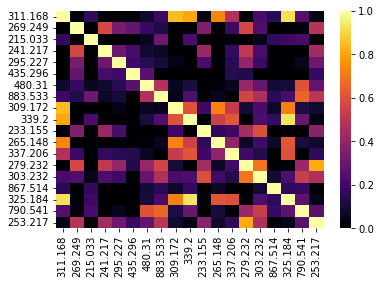

In [9]:
sns_heatmap(trainDEFSDf.corr())

In [10]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5.2, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
mz_corr(trainDEFSDf, "trainDEFSDf")

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217
311.168,NaN,0.222993,0.162715,0.257301,0.071104,0.141099,0.080607,0.185042,0.844877,0.808160,0.023498,0.733145,0.469896,0.006005,0.215599,0.141257,0.919343,0.245127,0.040550
269.249,NaN,NaN,0.282686,0.569869,0.334117,0.280860,0.173576,0.121701,0.006835,0.232345,0.354846,0.065796,0.185004,0.566351,0.231653,0.096561,0.218271,0.020327,0.486013
215.033,NaN,NaN,NaN,0.295978,0.137904,0.107271,0.061434,0.302077,0.031657,0.222427,0.223248,0.009882,0.165356,0.123309,0.048254,0.163767,0.191254,0.216048,0.136566
241.217,NaN,NaN,NaN,NaN,0.306804,0.214734,0.085102,0.065339,0.025929,0.271385,0.412409,0.084031,0.167818,0.510440,0.226510,0.111254,0.256911,0.025062,0.433775
295.227,NaN,NaN,NaN,NaN,NaN,0.199929,0.139383,0.097993,0.042802,0.072608,0.219292,0.012046,0.145367,0.399922,0.188449,0.038090,0.063926,0.053161,0.308537
435.296,NaN,NaN,NaN,NaN,NaN,NaN,0.258549,0.096296,0.009834,0.135012,0.117806,0.062018,0.134410,0.127372,0.195238,0.073204,0.129994,0.116001,0.179064
480.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.474605,0.056167,0.111150,0.181577,0.018941,0.057206,0.410516,0.289660,0.094631,0.101413,0.604755,0.278436
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048197,0.230753,0.043286,0.051350,0.005325,0.559208,0.462072,0.147148,0.214354,0.653290,0.499933
309.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603895,0.191310,0.724623,0.525904,0.096423,0.219252,0.074882,0.722638,0.117446,0.085486
339.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012633,0.545690,0.613232,0.014599,0.228933,0.164519,0.933394,0.293321,0.033350


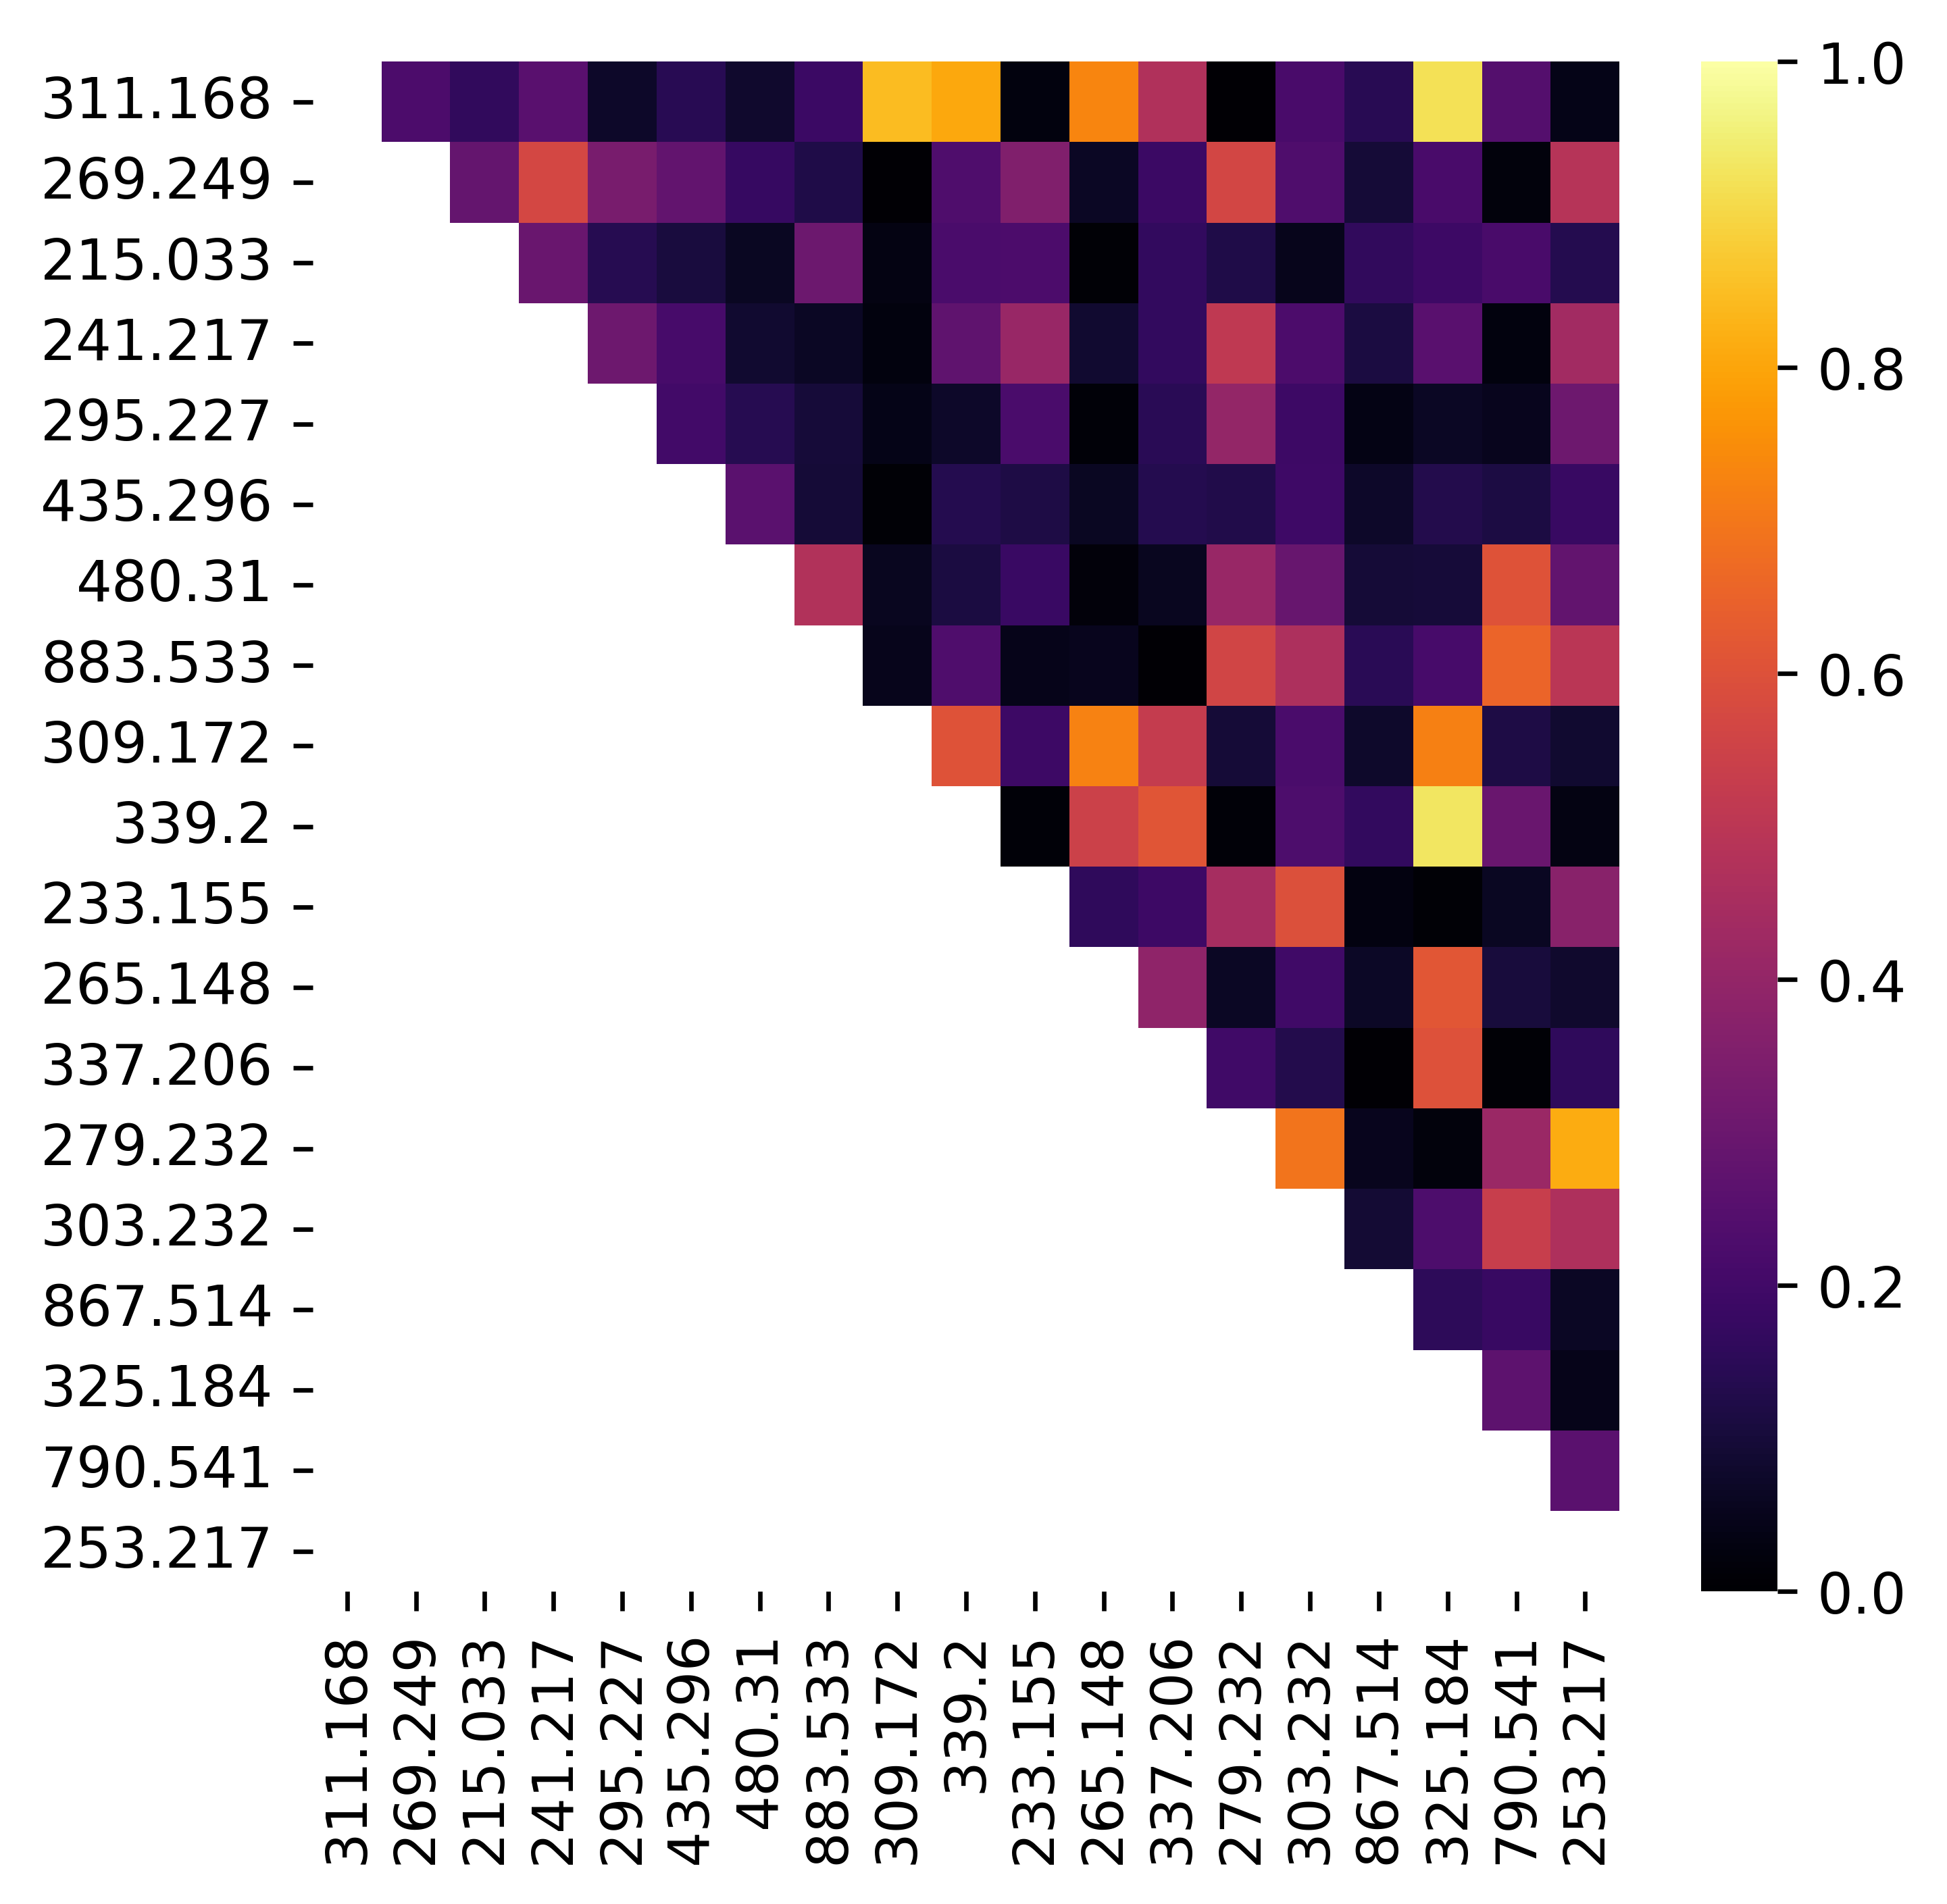

In [13]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

In [14]:
mz_corr(extDEFSDf, "extDEFSDf")

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217
311.168,NaN,0.496982,0.178021,0.539867,0.393183,0.202373,0.368970,0.464467,0.254669,0.856190,0.438482,0.549274,0.089654,0.430859,0.451917,0.489626,0.964526,0.386574,0.316226
269.249,NaN,NaN,0.018738,0.965858,0.890646,0.693686,0.800784,0.848964,0.055820,0.724484,0.757314,0.397219,0.022795,0.960425,0.799590,0.734798,0.586430,0.744102,0.761450
215.033,NaN,NaN,NaN,0.017372,0.137227,0.588754,0.071507,0.086561,0.047796,0.255982,0.061505,0.285713,0.068705,0.127828,0.264588,0.082278,0.219740,0.218491,0.486644
241.217,NaN,NaN,NaN,NaN,0.895551,0.681375,0.777477,0.858790,0.074716,0.743385,0.818663,0.423393,0.033855,0.921172,0.752795,0.720588,0.623689,0.783414,0.771950
295.227,NaN,NaN,NaN,NaN,NaN,0.772312,0.736737,0.700642,0.023603,0.573632,0.771810,0.273250,0.000768,0.923945,0.659027,0.514964,0.461411,0.762909,0.781798
435.296,NaN,NaN,NaN,NaN,NaN,NaN,0.500015,0.647042,0.011550,0.307608,0.621377,0.079756,0.033224,0.759959,0.695680,0.517878,0.236531,0.660609,0.895757
480.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.651434,0.022913,0.564858,0.626954,0.312447,0.001557,0.771269,0.559151,0.535574,0.444915,0.635441,0.521489
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094235,0.667459,0.753295,0.412625,0.032481,0.754093,0.745302,0.869805,0.547215,0.668631,0.786382
309.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250487,0.076448,0.384527,0.222907,0.014506,0.051147,0.124555,0.260574,0.030619,0.009351
339.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.576026,0.618996,0.120950,0.635722,0.578288,0.650104,0.918729,0.492548,0.425463


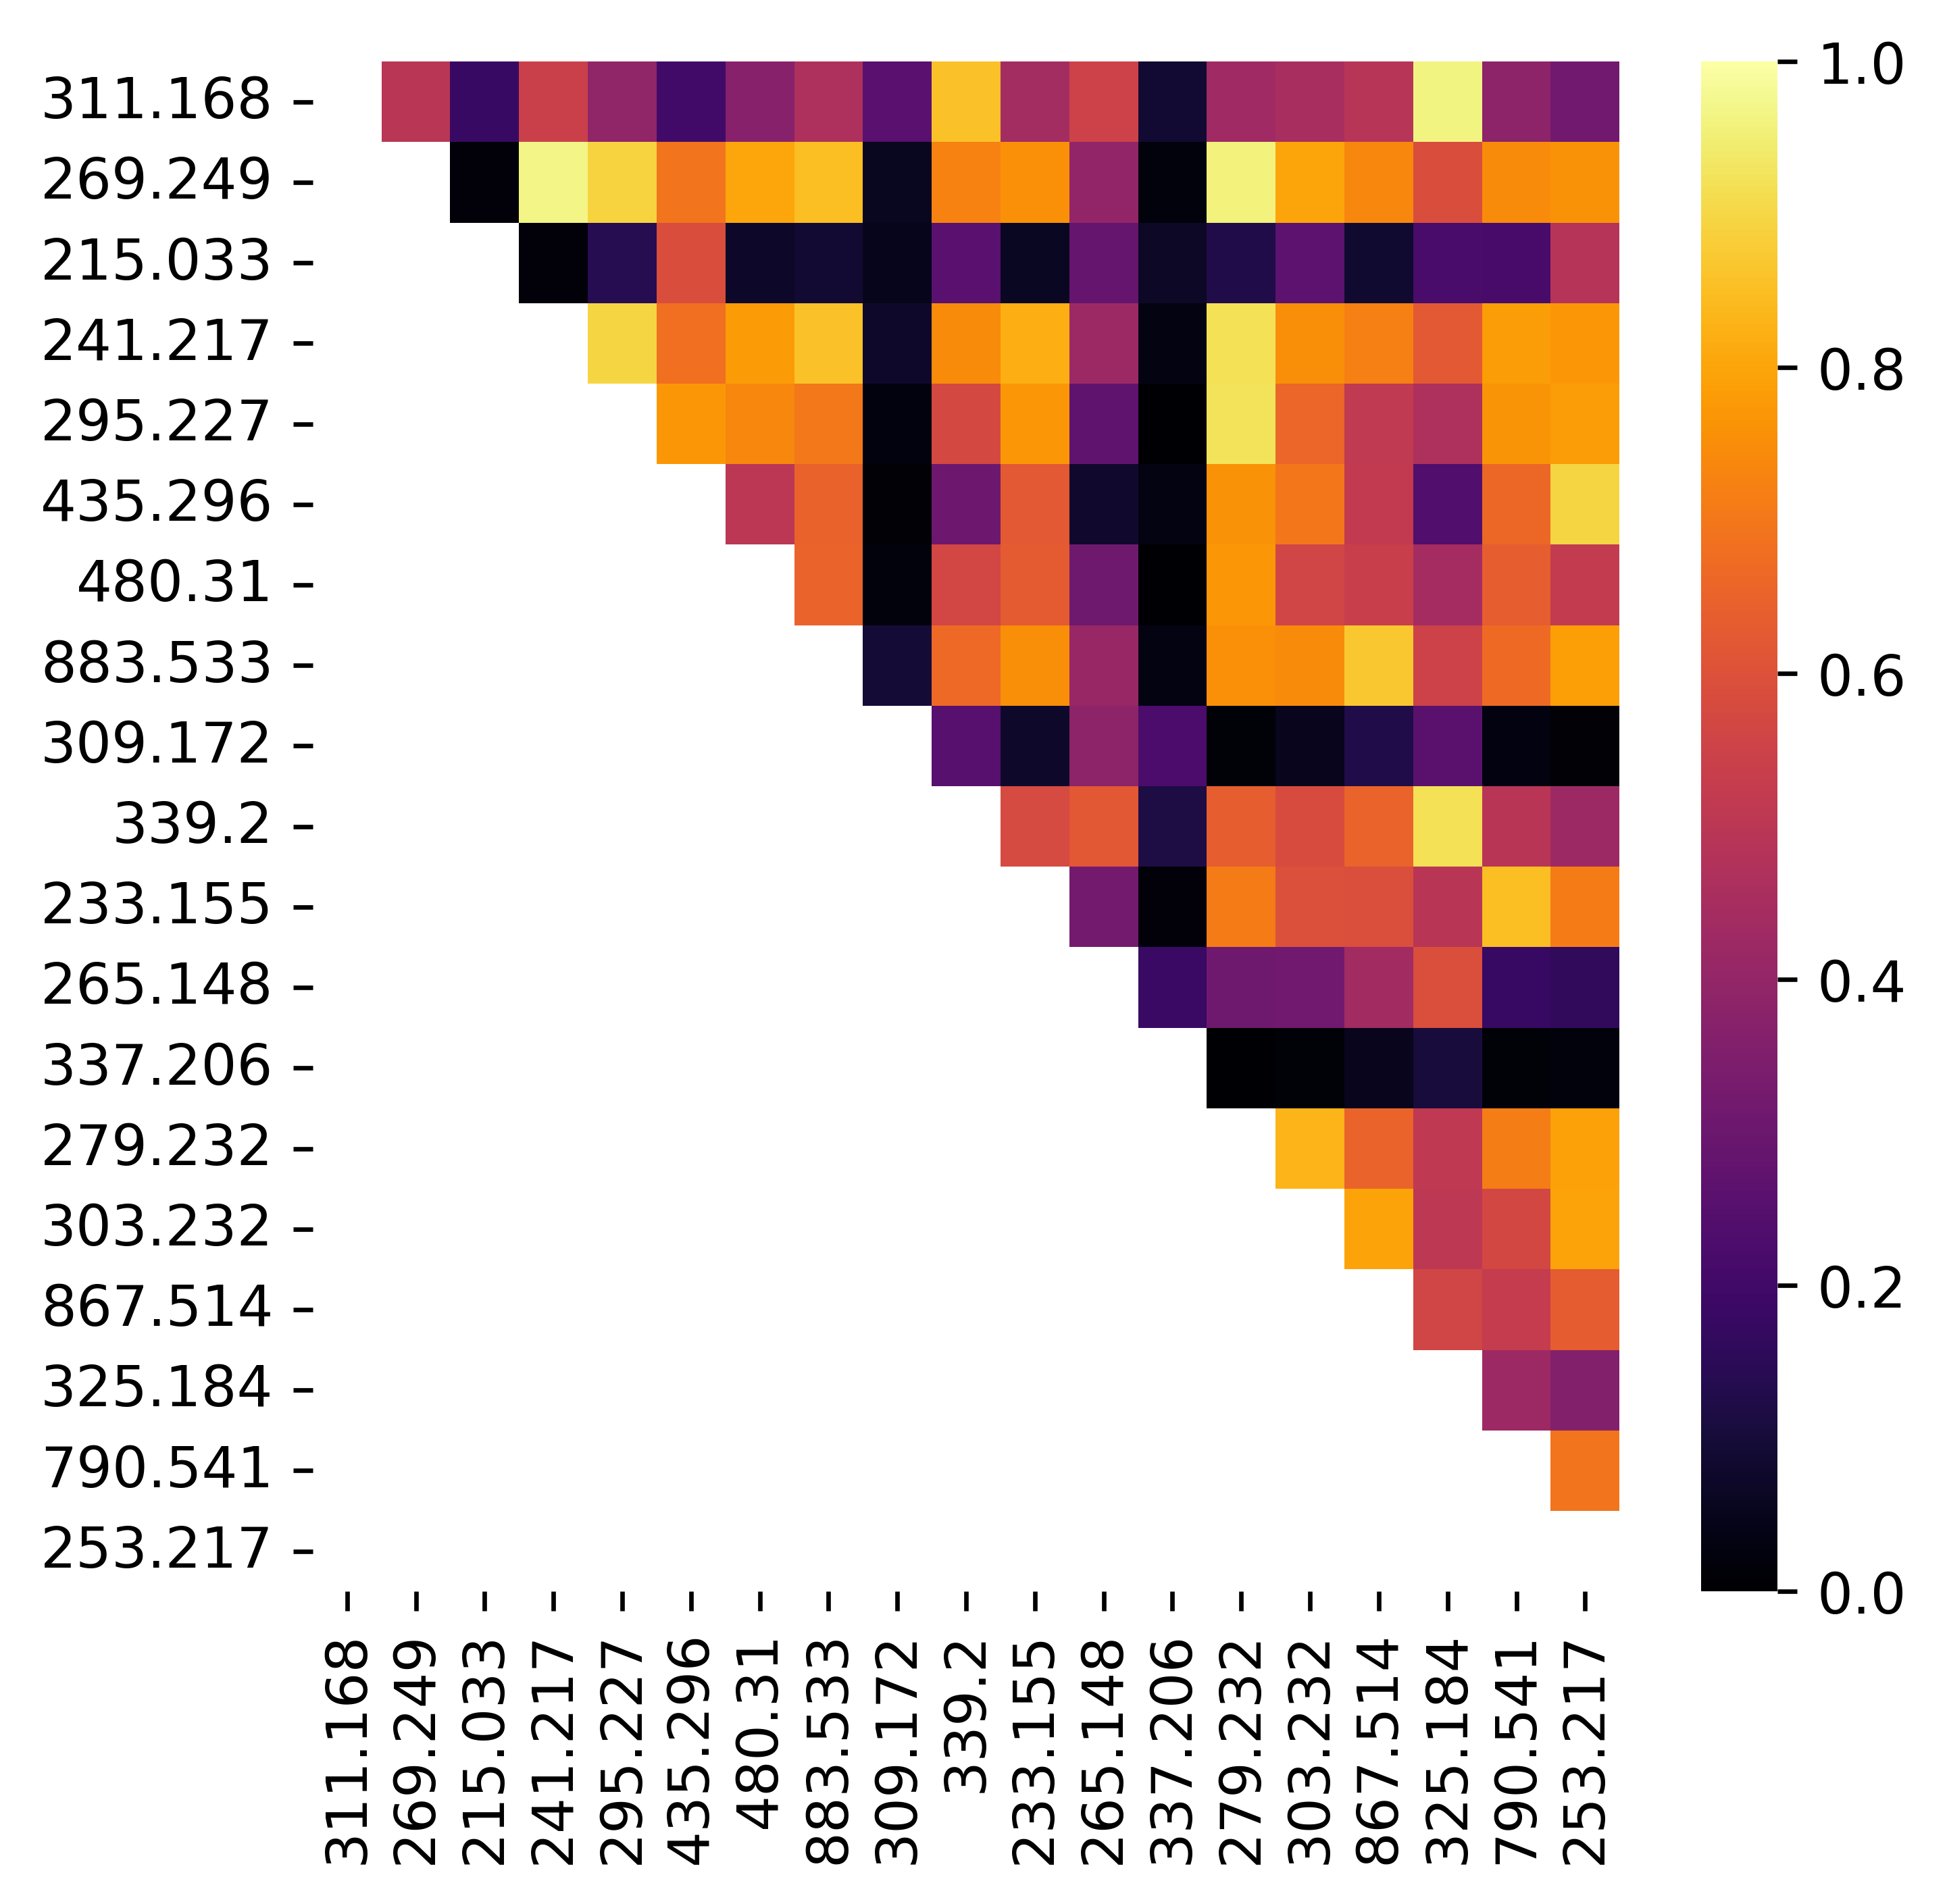

In [15]:
sns_heatmap(mz_corr(extDEFSDf, "extDEFSDf"))

In [16]:
mz_corr(fnaDEFSDf, "fnaDEFSDf")

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217
311.168,NaN,0.121479,0.030105,0.164896,0.055773,0.115904,0.074903,0.043974,0.248172,0.568166,0.125498,0.687187,0.460324,0.093627,0.005572,0.117800,0.698285,0.066774,0.057422
269.249,NaN,NaN,0.497753,0.429970,0.629636,0.395528,0.039292,0.066043,0.340164,0.080344,0.448267,0.125800,0.069461,0.474181,0.299251,0.047113,0.108744,0.122924,0.663905
215.033,NaN,NaN,NaN,0.178175,0.650837,0.625944,0.095005,0.304443,0.293844,0.002452,0.196316,0.025391,0.014170,0.713471,0.514952,0.084290,0.029646,0.231356,0.680599
241.217,NaN,NaN,NaN,NaN,0.363258,0.140229,0.014803,0.013316,0.201447,0.110813,0.526744,0.177517,0.094376,0.125813,0.143487,0.063444,0.144635,0.073941,0.470453
295.227,NaN,NaN,NaN,NaN,NaN,0.514590,0.052812,0.056394,0.366304,0.027298,0.403027,0.056929,0.023711,0.632644,0.414571,0.078221,0.042466,0.170563,0.719385
435.296,NaN,NaN,NaN,NaN,NaN,NaN,0.118027,0.181442,0.257149,0.048487,0.167452,0.220212,0.034590,0.665095,0.319427,0.198947,0.089452,0.062903,0.627347
480.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.365677,0.038043,0.037649,0.106363,0.113172,0.024137,0.349505,0.439689,0.177967,0.061857,0.341789,0.192329
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035360,0.018163,0.015004,0.066522,0.003874,0.429340,0.499512,0.200338,0.043917,0.439168,0.278273
309.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207559,0.242446,0.238063,0.213562,0.260506,0.083066,0.059791,0.248760,0.032229,0.314916
339.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094605,0.457463,0.568593,0.050314,0.026707,0.056362,0.616459,0.027624,0.054667


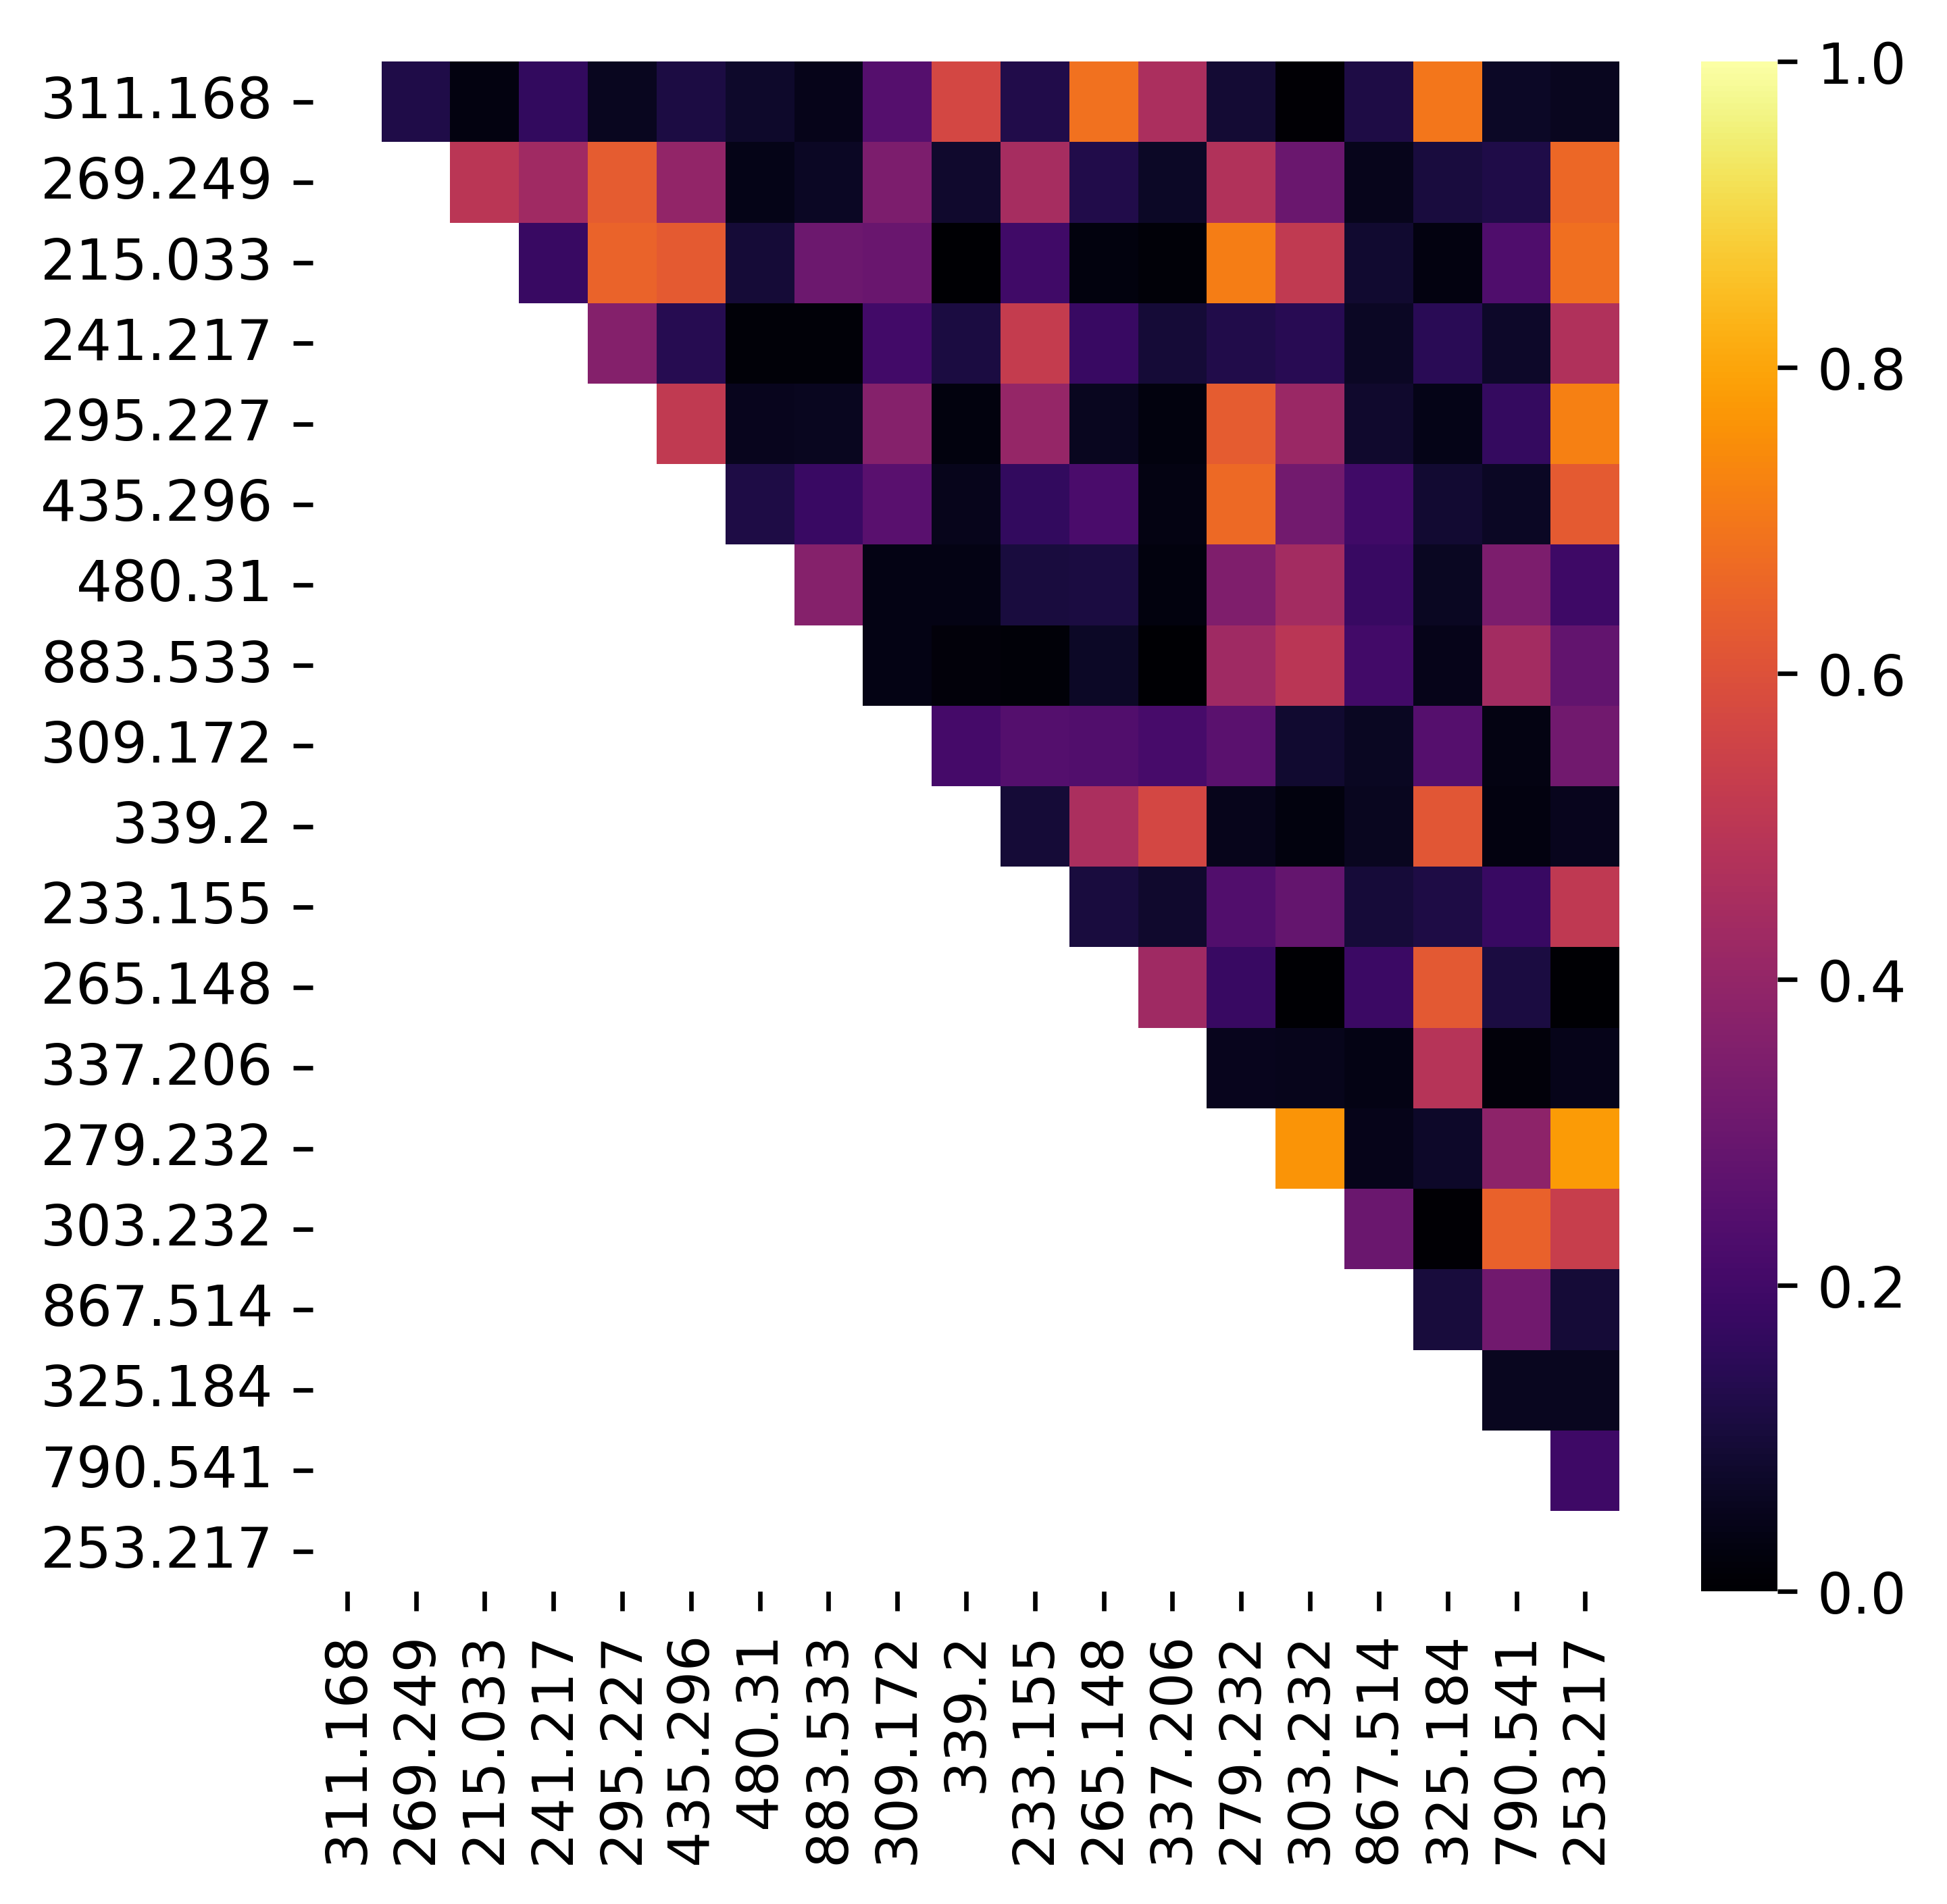

In [17]:
sns_heatmap(mz_corr(fnaDEFSDf, "fnaDEFSDf"))

In [18]:
mz_corr(ingestedDEFSDf, "ingestedDEFSDf")

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217
311.168,NaN,0.12383,0.096284,0.159232,0.010889,0.126786,0.083188,0.151652,0.828086,0.808195,0.034769,0.731112,0.463708,0.041333,0.215301,0.106329,0.919900,0.244915,0.049450
269.249,NaN,NaN,0.027743,0.773090,0.675240,0.273017,0.079589,0.566416,0.091856,0.137512,0.555256,0.029685,0.080374,0.747286,0.260665,0.523658,0.118562,0.098039,0.711039
215.033,NaN,NaN,NaN,0.011135,0.142559,0.055572,0.014561,0.306649,0.063435,0.118481,0.010584,0.023579,0.134966,0.114676,0.092717,0.272498,0.109037,0.177296,0.320174
241.217,NaN,NaN,NaN,NaN,0.632678,0.214875,0.004304,0.513932,0.109011,0.181148,0.601091,0.047482,0.072338,0.669727,0.225894,0.497840,0.158472,0.049659,0.668178
295.227,NaN,NaN,NaN,NaN,NaN,0.251126,0.068526,0.552678,0.055545,0.016275,0.463273,0.022194,0.042743,0.734547,0.239281,0.510158,0.003988,0.156477,0.695328
435.296,NaN,NaN,NaN,NaN,NaN,NaN,0.266820,0.042233,0.008547,0.116343,0.060300,0.056756,0.126848,0.232773,0.082332,0.031755,0.114549,0.044371,0.260147
480.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.263854,0.080221,0.123355,0.210107,0.022900,0.069226,0.269955,0.304635,0.030037,0.106328,0.596392,0.103700
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050780,0.175712,0.323976,0.052890,0.040825,0.708242,0.407783,0.656618,0.173255,0.496505,0.745783
309.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596882,0.086915,0.713718,0.528963,0.001116,0.205438,0.067510,0.709027,0.114272,0.042370
339.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009278,0.545947,0.607800,0.052244,0.236495,0.103173,0.932780,0.295762,0.035367


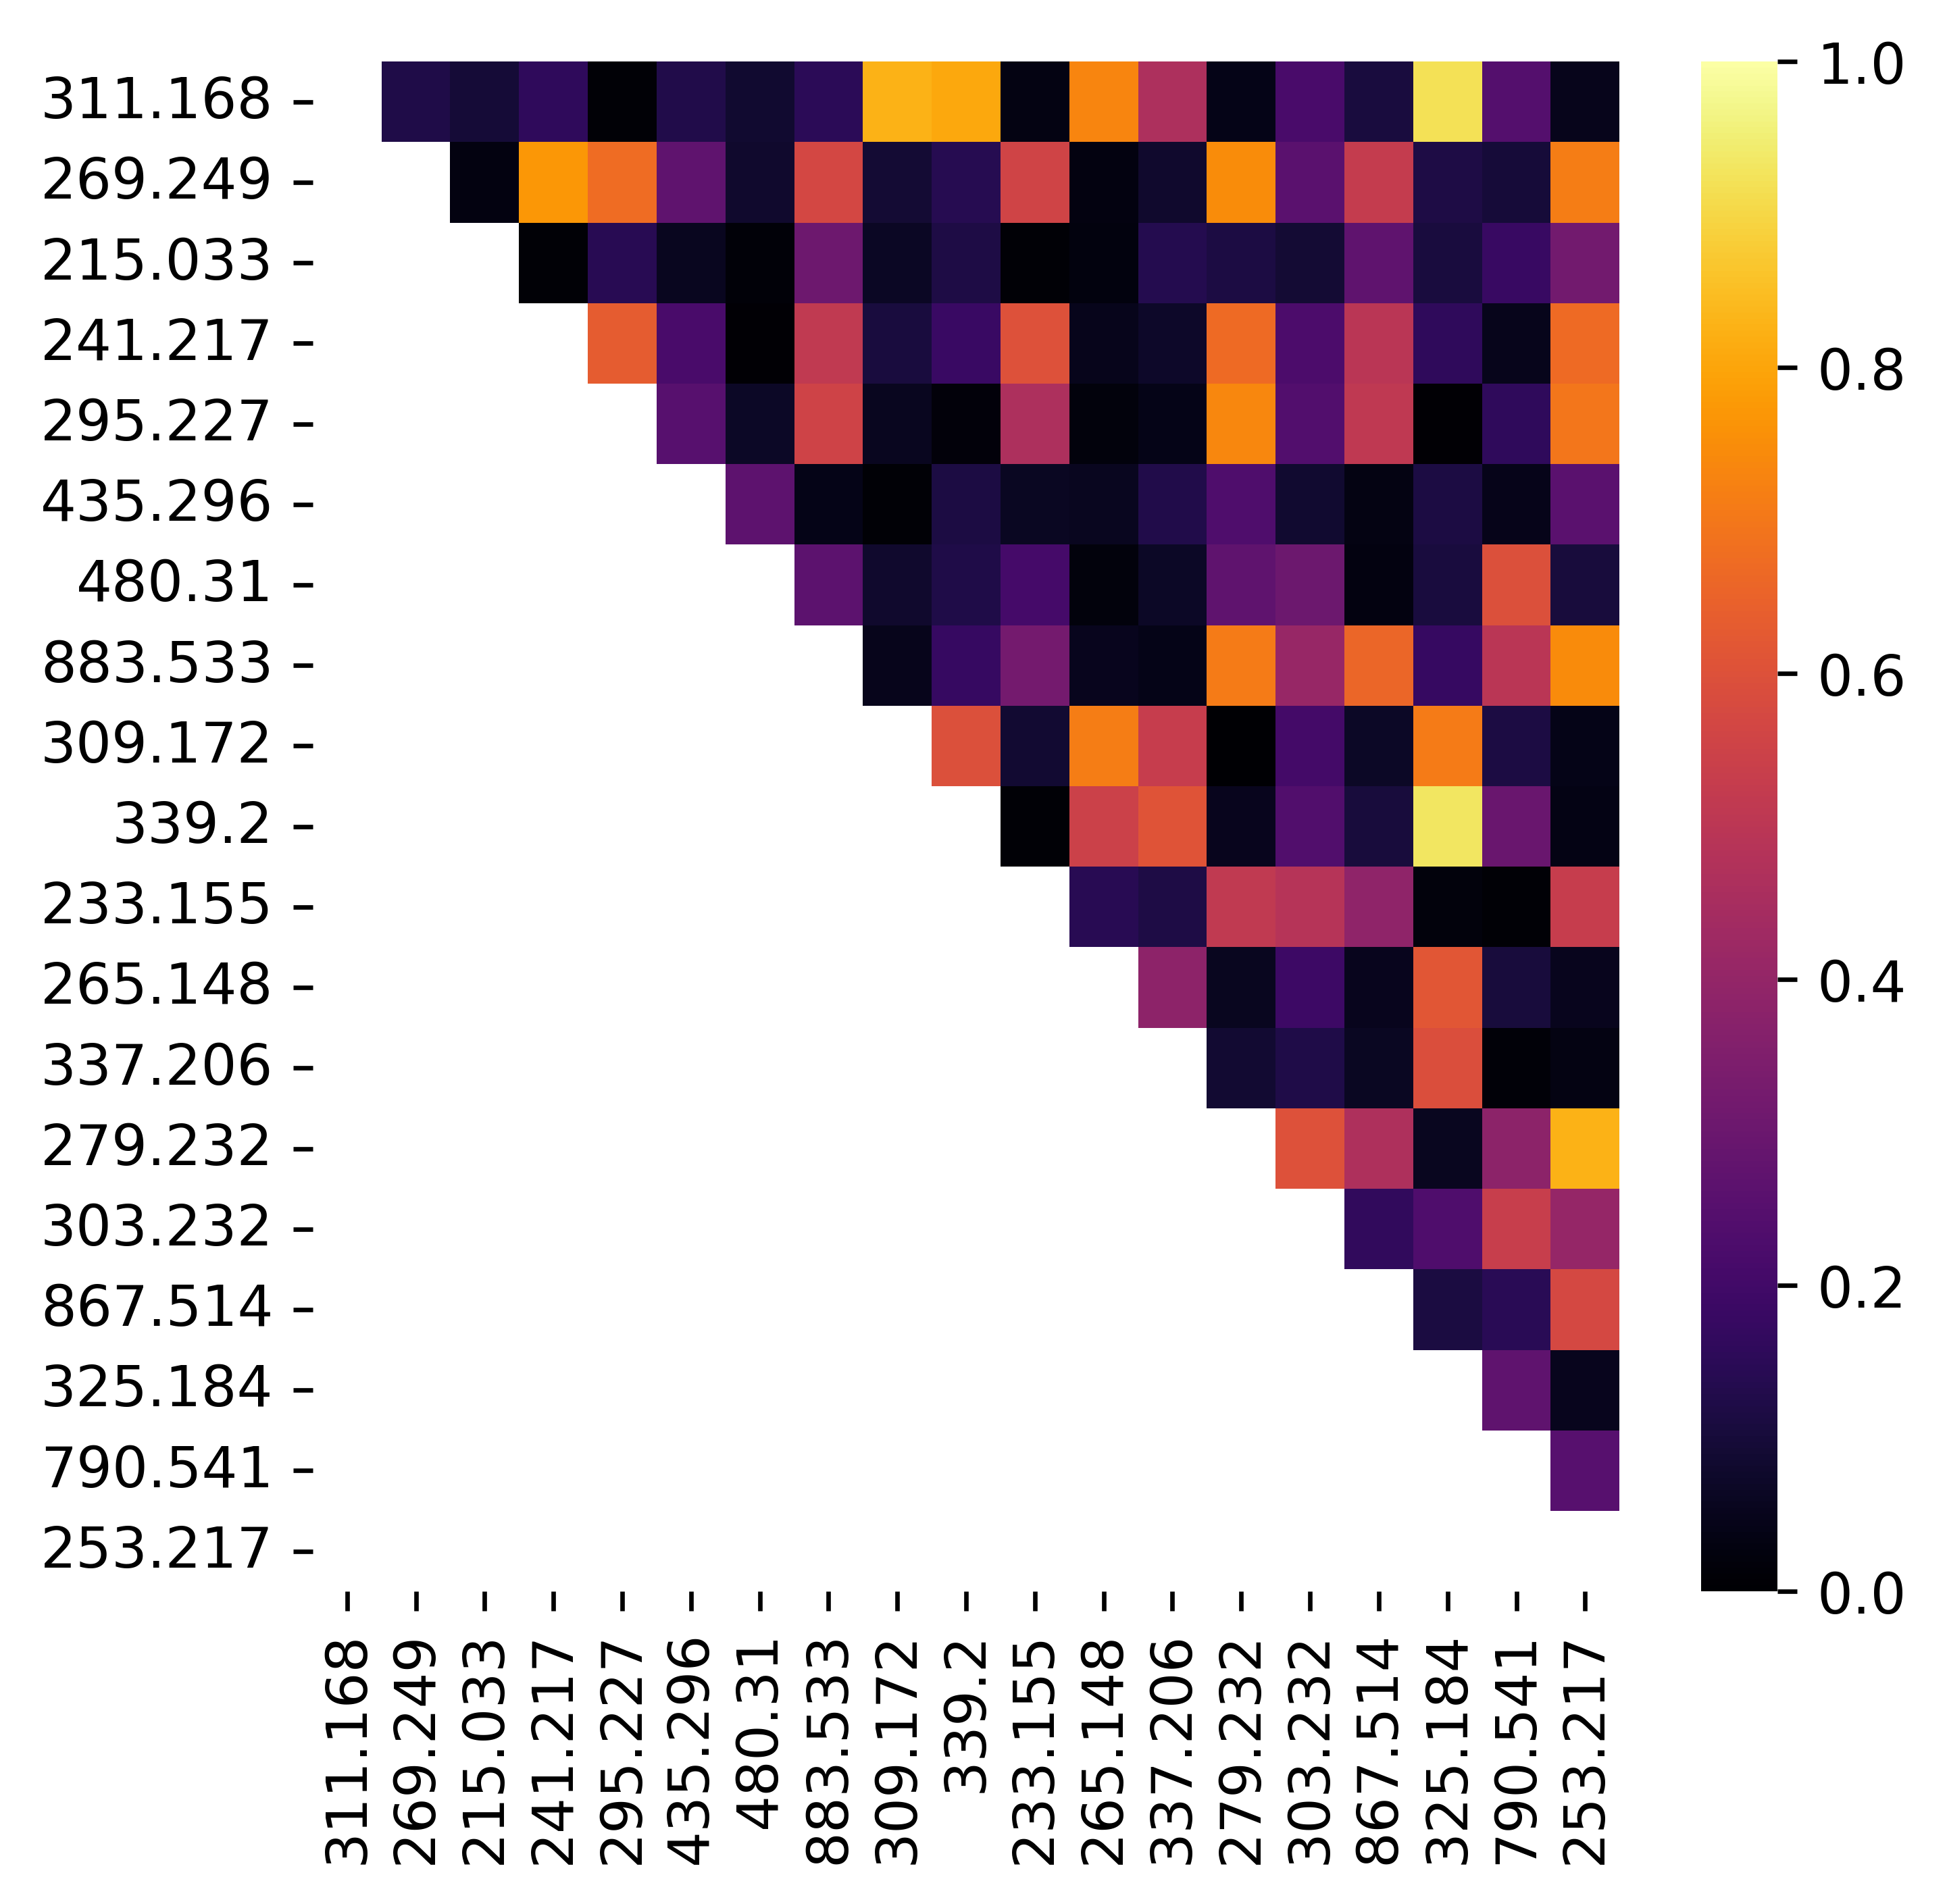

In [19]:
sns_heatmap(mz_corr(ingestedDEFSDf, "ingestedDEFSDf"))

In [20]:
mz_corr(diDEFSDf, "diDEFSDf")

,311.168,269.249,215.033,241.217,295.227,435.296,480.31,883.533,309.172,339.2,233.155,265.148,337.206,279.232,303.232,867.514,325.184,790.541,253.217
311.168,NaN,0.406679,0.035521,0.390110,0.172548,0.421971,0.123133,0.251076,0.441903,0.915732,0.229401,0.429604,0.477881,0.360440,0.231549,0.198017,0.978378,0.062315,0.366651
269.249,NaN,NaN,0.161617,0.829359,0.520350,0.441762,0.250783,0.215368,0.623420,0.600354,0.704087,0.568008,0.694538,0.524469,0.419921,0.007520,0.512519,0.280876,0.753535
215.033,NaN,NaN,NaN,0.112253,0.148373,0.183659,0.339740,0.174091,0.051043,0.056656,0.157843,0.079620,0.004068,0.059883,0.089123,0.142742,0.046988,0.187753,0.252697
241.217,NaN,NaN,NaN,NaN,0.445694,0.525456,0.139675,0.211559,0.616567,0.575937,0.726063,0.579716,0.696187,0.471949,0.425614,0.038881,0.492196,0.247864,0.764813
295.227,NaN,NaN,NaN,NaN,NaN,0.264049,0.324900,0.027093,0.352974,0.326193,0.127772,0.413765,0.340352,0.703079,0.648689,0.038675,0.246646,0.071951,0.748170
435.296,NaN,NaN,NaN,NaN,NaN,NaN,0.164645,0.234073,0.332111,0.450510,0.304170,0.349039,0.385636,0.266307,0.160765,0.214324,0.440758,0.055279,0.551527
480.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.165994,0.205975,0.307562,0.234923,0.141572,0.261368,0.309747,0.312680,0.273325,0.213345,0.483946,0.184989
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.371871,0.352560,0.259626,0.324264,0.404777,0.179834,0.076847,0.317673,0.300795,0.536210,0.179504
309.172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667198,0.606196,0.966452,0.917071,0.537441,0.406979,0.110590,0.563840,0.363052,0.470819
339.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453445,0.631454,0.721064,0.531706,0.404491,0.054147,0.974457,0.235641,0.527611


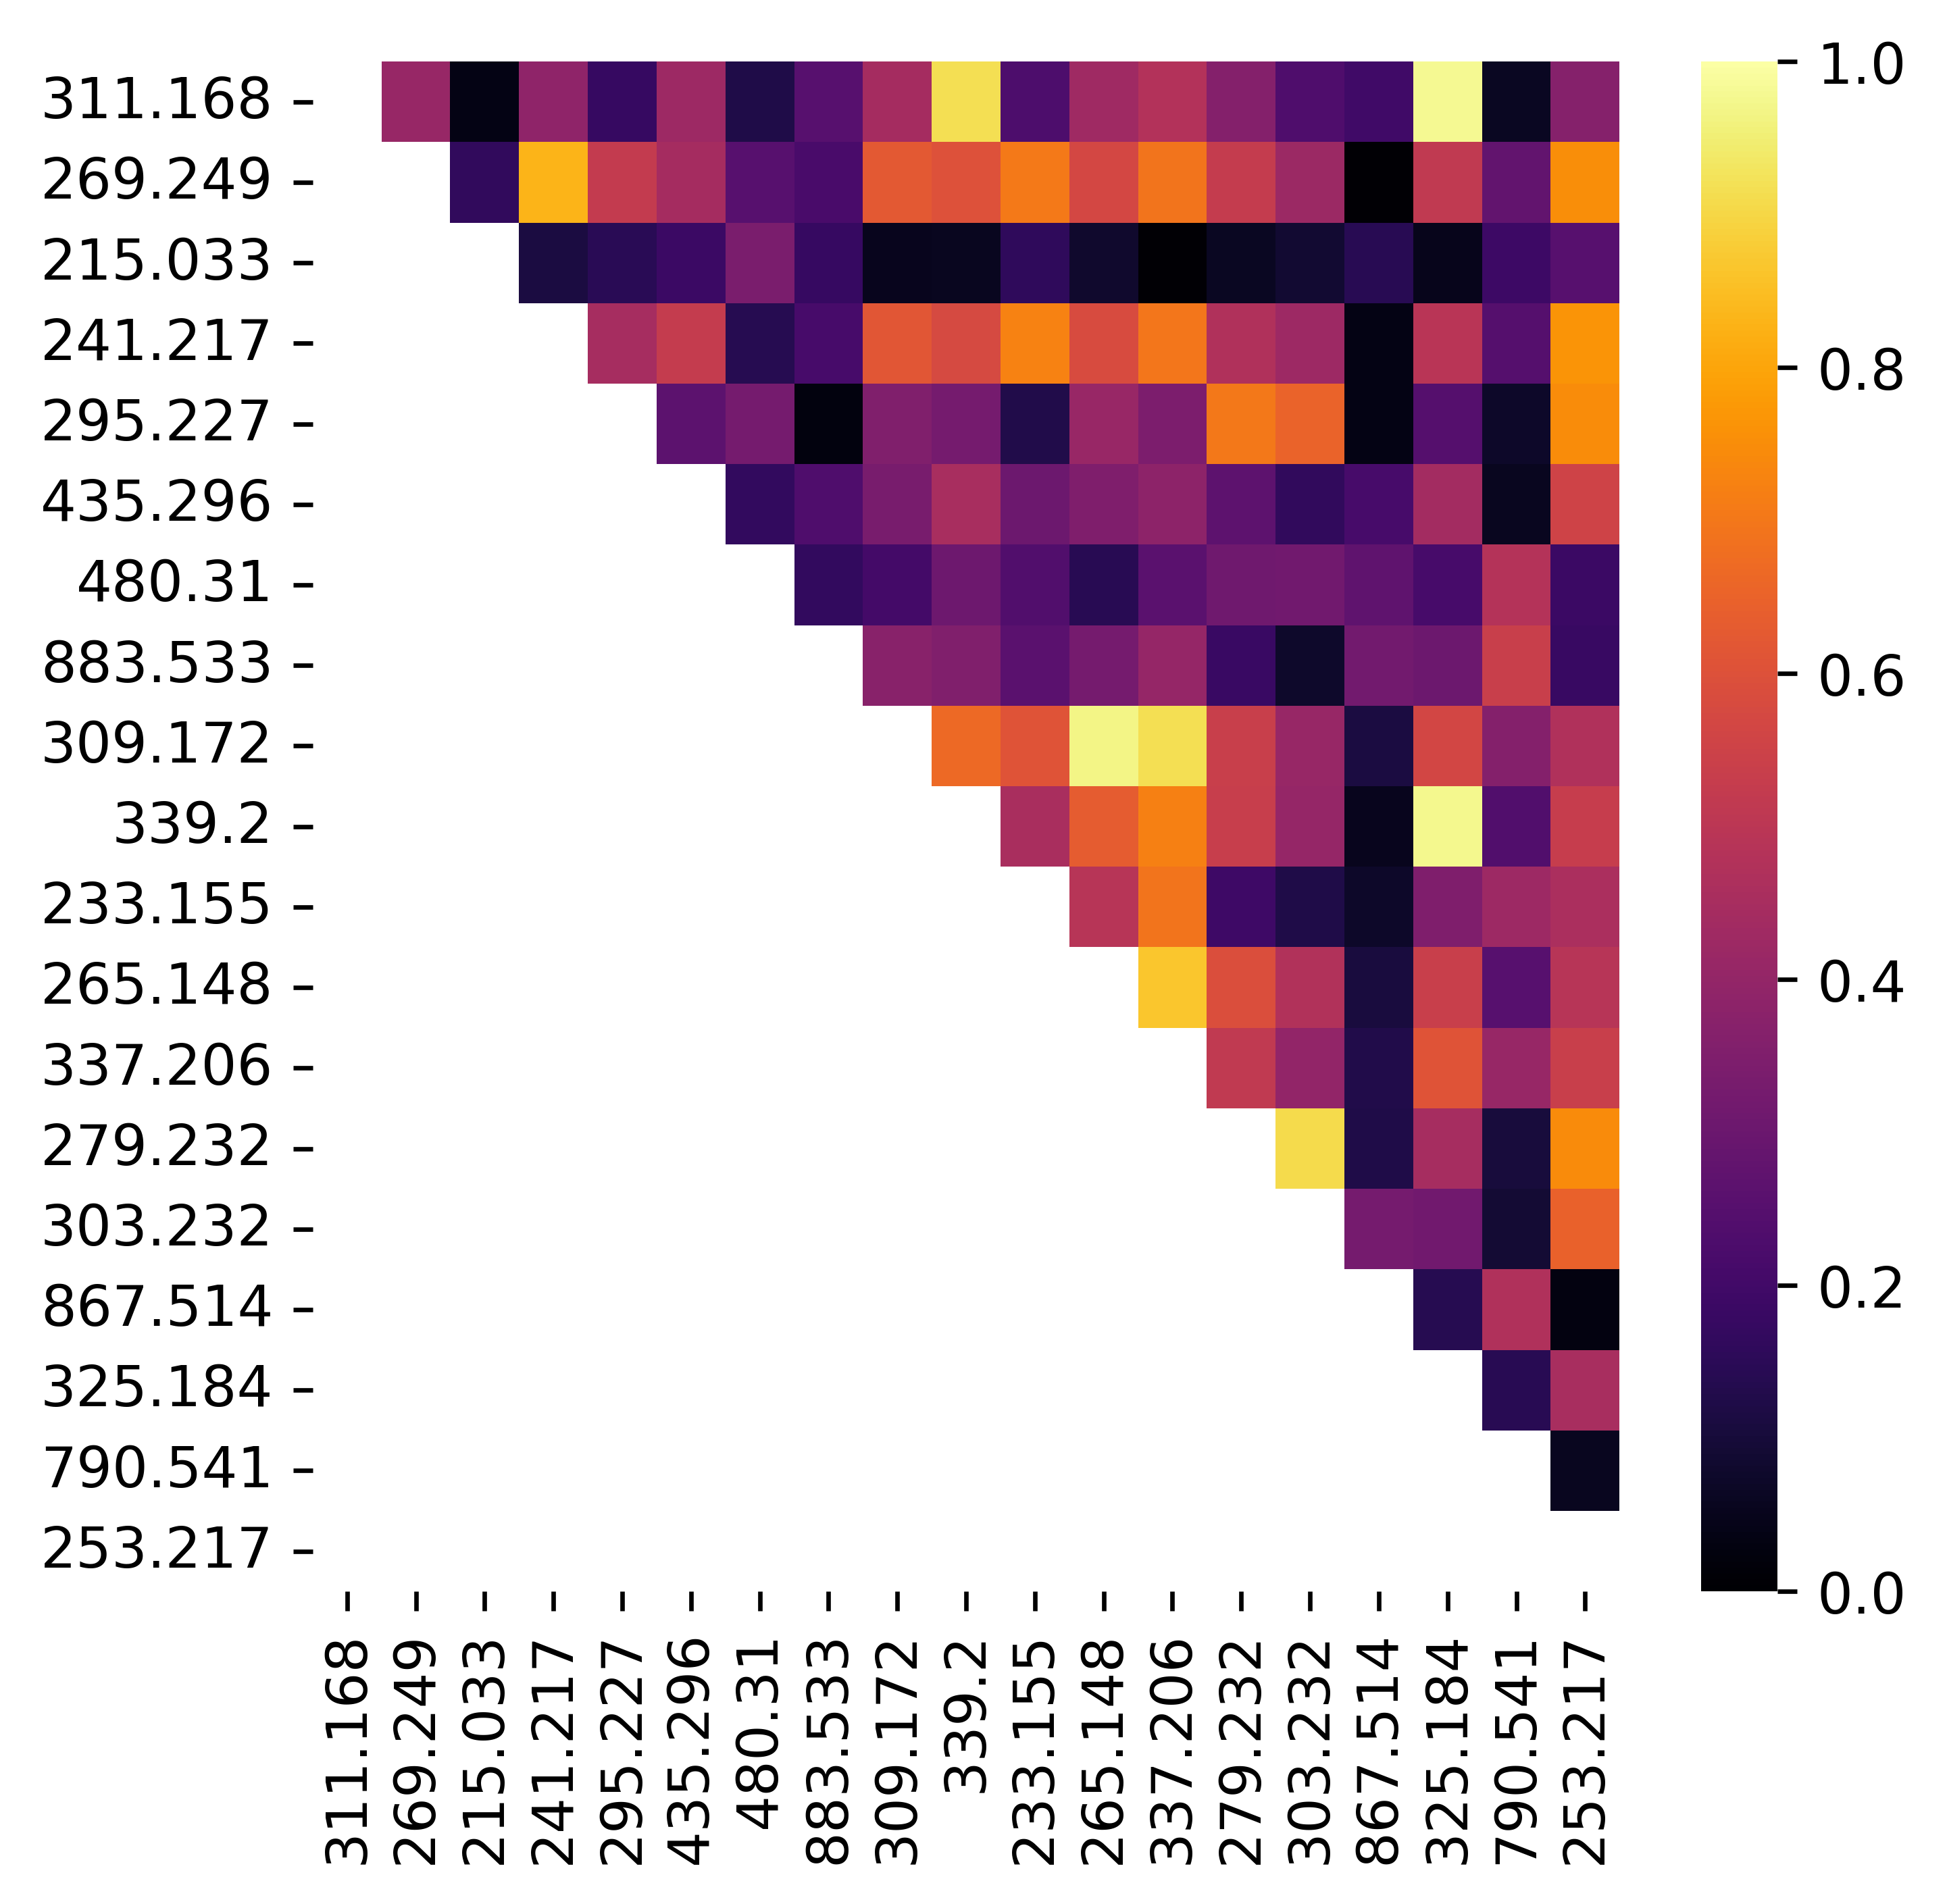

In [21]:
sns_heatmap(mz_corr(diDEFSDf, "diDEFSDf"))